In [7]:
#CELL-NO: 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print ("All imports succesful")

All imports succesful


In [8]:
#CELL-NO: 2
# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, 
                       noise=10, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create AdaBoost regressor with decision trees
ada_regressor = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train the model
ada_regressor.fit(X_train, y_train)
print("model training with adaboost successful")

model training with adaboost successful


In [9]:
#CELL-NO: 3
# Make predictions
y_pred = ada_regressor.predict(X_test)

# Evaluate performance
print("AdaBoost Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


AdaBoost Regression Results:
RMSE: 134.9754
MAE: 109.1693
R² Score: 0.6435


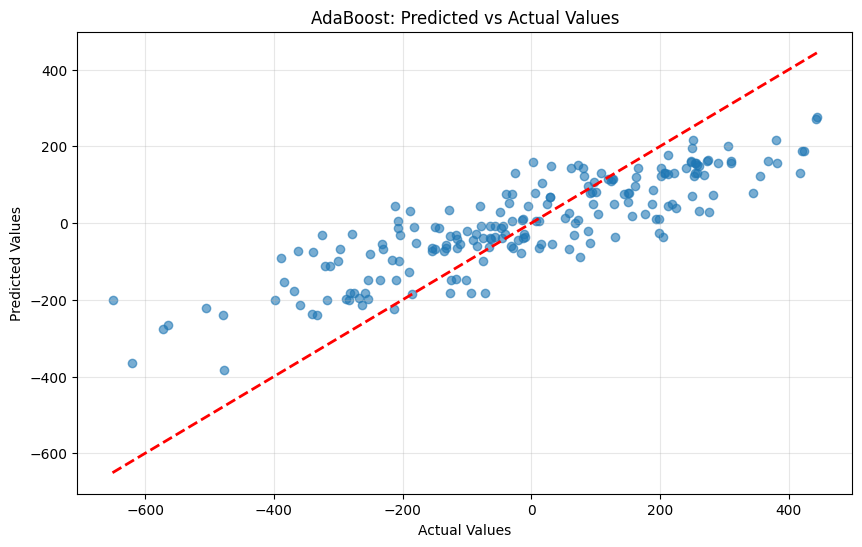

In [10]:
#CELL-NO: 4
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('AdaBoost: Predicted vs Actual Values')
plt.grid(True, alpha=0.3)
plt.show()

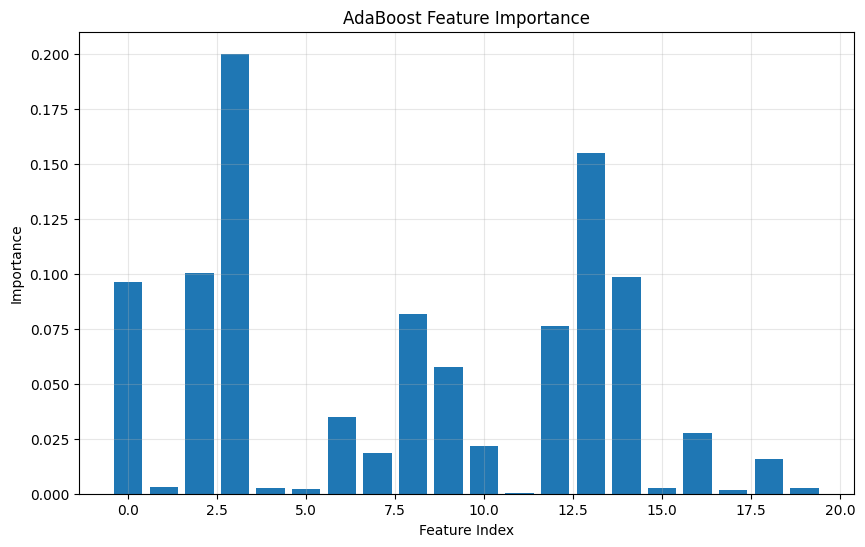

In [11]:
#CELL-NO: 5
# Visualize feature importance
feature_importance = ada_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('AdaBoost Feature Importance')
plt.grid(True, alpha=0.3)
plt.show()


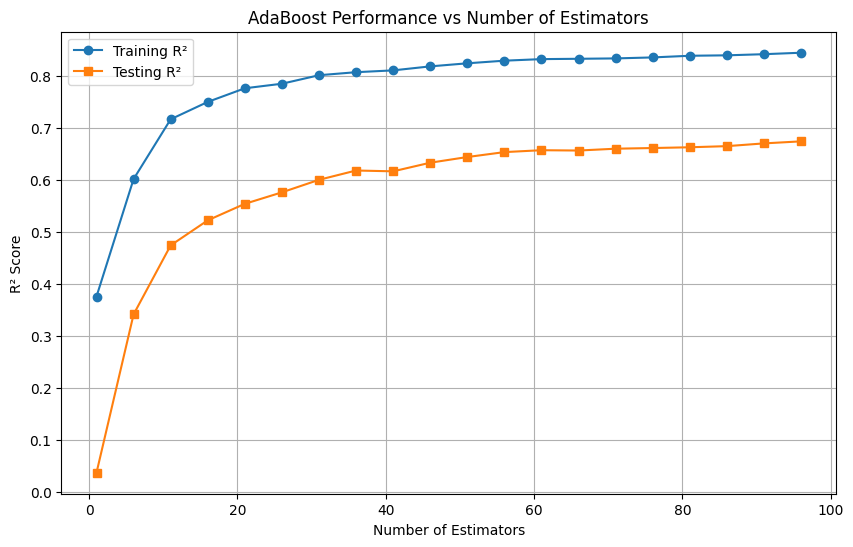

In [12]:
#CELL-NO: 6
# Study the effect of number of estimators
estimator_range = range(1, 101, 5)
train_scores = []
test_scores = []

for n_est in estimator_range:
    ada_temp = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=4),
        n_estimators=n_est,
        random_state=42
    )
    ada_temp.fit(X_train, y_train)
    train_scores.append(ada_temp.score(X_train, y_train))
    test_scores.append(ada_temp.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_scores, label='Training R²', marker='o')
plt.plot(estimator_range, test_scores, label='Testing R²', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.title('AdaBoost Performance vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()